# livelossplot example: Keras

Last update: `livelossplot 0.5.0`. For code and documentation, see [livelossplot GitHub repository](https://github.com/stared/livelossplot).

<a href="https://colab.research.google.com/github/stared/livelossplot/blob/master/examples/keras.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>

## Note

The syntax changed, and from `0.5+` on it is (for raw Keras, and Keras as a TensorFlow module, respectively):

```{python}
from livelossplot import PlotLossesKeras, PlotPlossesKerasTF
```

and alternate API is

```{python}
from livelossplot.inputs.keras import PlotLossesCallback
from livelossplot.inputs.tf_keras import PlotLossesCallback
```

For livelossplot 0.3 and 0.4, it is

```{python}
from livelossplot.keras import PlotLossesCallback
from livelossplot.tf_keras import PlotLossesCallback
```

It works (for now), but will raise deprecation errors. Please update your API to the newest one.


In [1]:
!pip install livelossplot --quiet

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

# raw keras
from livelossplot import PlotLossesKeras

# tensorflow.keras
# from livelossplot import PlotLossesKerasTF

Using TensorFlow backend.


In [2]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [4]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

In [5]:
plotlosses = PlotLossesKeras()

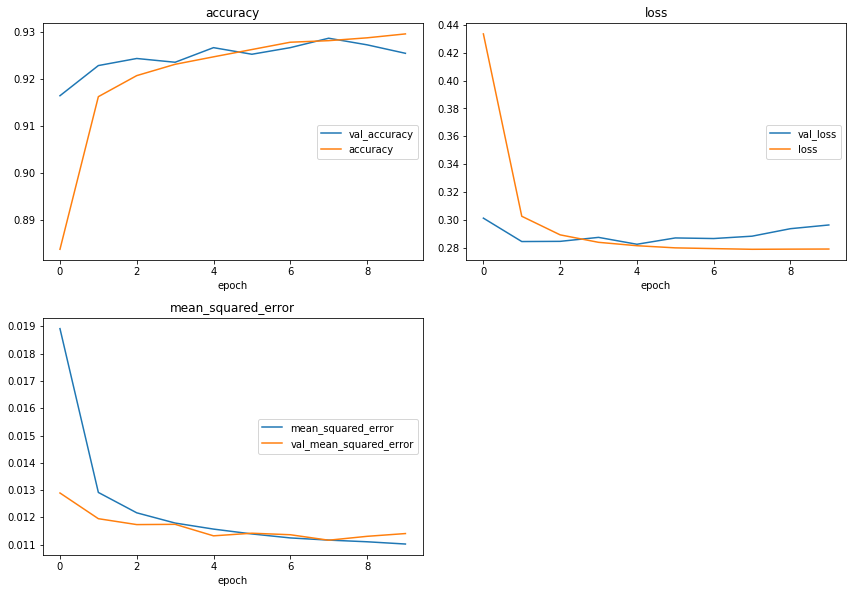

accuracy
	val_accuracy     	 (min:    0.916, max:    0.929, cur:    0.925)
	accuracy         	 (min:    0.884, max:    0.930, cur:    0.930)
loss
	val_loss         	 (min:    0.282, max:    0.301, cur:    0.296)
	loss             	 (min:    0.279, max:    0.434, cur:    0.279)
mean_squared_error
	mean_squared_error 	 (min:    0.011, max:    0.019, cur:    0.011)
	val_mean_squared_error 	 (min:    0.011, max:    0.013, cur:    0.011)


In [6]:
model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plotlosses],
          verbose=False)